#%% [markdown]

 # requirements

In [ ]:
import math
import itertools
import numpy as np
import pandas as pd
#Graph
import seaborn  as sns
import matplotlib.pyplot as plt
# root path
import sys
import os

# Add the project root directory to sys.path
project_root = os.path.abspath(os.path.join(os.path.dirname(__file__), ".."))
sys.path.append(project_root)

# Now you can import from src
from src.app.utils import open_json

#%% [markdown]

 # data

In [ ]:
df = pd.read_json('../data/data_jobs.json')
df

,vacancy_name,company,location,work_modality_english,seniority,link,job_function,industries,description,apply_link,publication_date,query_keyword,country,scraping_date
0,Científico de Datos - JR,NEORIS,"Bogotá, Capital District, Colombia",Full-time,Entry level,https://co.linkedin.com/jobs/view/cient%C3%ADf...,Engineering and Information Technology,IT Services and IT Consulting,NEORIS es un acelerador Digital que ayuda a la...,,2025-03-04,Senior AI Engineer,colombia,2025-03-05
1,Senior Software Engineer (AI and automation),Auxis,"Bogotá, Capital District, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/senior-softw...,"Engineering, Information Technology, and Busin...",Outsourcing and Offshoring Consulting and IT S...,AUXIS is looking for a Senior Developer specia...,,2025-03-04,Senior AI Engineer,colombia,2025-03-05
2,Analista Junior Analytics Fraudes,Itaú Colombia,"Bogota, D.C., Capital District, Colombia",Full-time,Associate,https://co.linkedin.com/jobs/view/analista-jun...,"Analyst, Engineering, and Research","Banking, Financial Services, and Loan Brokers",¿Eres de los que dice: voy buscando un gran de...,,2025-03-04,Machine Learning,colombia,2025-03-05
3,Científico de Datos - JR,NEORIS,"Bogotá, Capital District, Colombia",Full-time,Entry level,https://co.linkedin.com/jobs/view/cient%C3%ADf...,Engineering and Information Technology,IT Services and IT Consulting,NEORIS es un acelerador Digital que ayuda a la...,,2025-03-04,Machine Learning,colombia,2025-03-05
4,Math Analyst,OMD Colombia,"Bogota, D.C., Capital District, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/math-analyst...,Advertising and Marketing,Advertising Services,¡En OMD Colombia tenemos una oportunidad incre...,,2025-03-04,Machine Learning,colombia,2025-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,AUXILIAR DE PROYECTOS,Abbott,"Cali, Valle del Cauca, Colombia",Full-time,Entry level,https://co.linkedin.com/jobs/view/auxiliar-de-...,Production and Manufacturing,Hospitals and Health Care,Acerca de Abbott\n\nAbbott es líder mundial en...,,2025-03-05,Gestión de proyectos en salud,colombia,2025-03-05
5482,Jefe de mantenimiento / Plantas de producción,Alfa Colombia,"Soacha, Cundinamarca, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/jefe-de-mant...,Management and Manufacturing,Building Materials,!En ALFA abrimos nuestras puertas al mejor tal...,,2025-03-05,Gestión de proyectos en salud,colombia,2025-03-05
5483,Profesional Social (Entry Level),ERM,"Bogota, D.C., Capital District, Colombia",Full-time,Entry level,https://co.linkedin.com/jobs/view/profesional-...,Other,"Environmental Services, Civil Engineering, and...",ERM Colombia se encuentra en la búsqueda de su...,,2025-03-05,Gestión de proyectos en salud,colombia,2025-03-05
5484,Productor Ejecutivo/a Junior,McCANN Worldgroup Colombia,Bogotá D.C. Metropolitan Area,Full-time,Director,https://co.linkedin.com/jobs/view/productor-ej...,,Advertising Services,"En McCANN, estamos en búsqueda de Productora E...",,2025-03-05,Coordinación de equipos multidisciplinarios,colombia,2025-03-05


In [ ]:
# %%

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5486 entries, 0 to 5485
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   vacancy_name           5486 non-null   object
 1   company                5486 non-null   object
 2   location               5486 non-null   object
 3   work_modality_english  5486 non-null   object
 4   seniority              5486 non-null   object
 5   link                   5486 non-null   object
 6   job_function           5486 non-null   object
 7   industries             5486 non-null   object
 8   description            5486 non-null   object
 9   apply_link             5486 non-null   object
 10  publication_date       5486 non-null   object
 11  query_keyword          5486 non-null   object
 12  country                5486 non-null   object
 13  scraping_date          5486 non-null   object
dtypes: object(14)
memory usage: 642.9+ KB


In [ ]:
# %%

df_types = pd.DataFrame(df.dtypes)
object_features = df_types[df_types[0] == 'object'].index.to_list()
object_features

['vacancy_name',
 'company',
 'location',
 'work_modality_english',
 'seniority',
 'link',
 'job_function',
 'industries',
 'description',
 'apply_link',
 'publication_date',
 'query_keyword',
 'country',
 'scraping_date']

In [ ]:
# %%

float_features = df_types[df_types[0] == 'float64'].index.to_list()
float_features

[]

In [ ]:
# %%

int_features = df_types[df_types[0] == 'int64'].index.to_list()
int_features

[]

In [ ]:
# %%

bool_features = df_types[df_types[0] == 'bool'].index.to_list()
bool_features

[]

In [ ]:
#%%

df.describe().T

,count,unique,top,freq
vacancy_name,5486,2005,Data Scientist,163
company,5486,1536,TieTalent,182
location,5486,661,United States,642
work_modality_english,5486,5,Full-time,5477
seniority,5486,7,Mid-Senior level,3369
link,5486,5486,https://co.linkedin.com/jobs/view/cient%C3%ADf...,1
job_function,5486,237,Engineering and Information Technology,2292
industries,5486,408,IT Services and IT Consulting,819
description,5486,2472,Canonical is a leading provider of open source...,70
apply_link,5486,1,,5486


In [ ]:
# %%

df[object_features].describe(include='all').T

,count,unique,top,freq
vacancy_name,5486,2005,Data Scientist,163
company,5486,1536,TieTalent,182
location,5486,661,United States,642
work_modality_english,5486,5,Full-time,5477
seniority,5486,7,Mid-Senior level,3369
link,5486,5486,https://co.linkedin.com/jobs/view/cient%C3%ADf...,1
job_function,5486,237,Engineering and Information Technology,2292
industries,5486,408,IT Services and IT Consulting,819
description,5486,2472,Canonical is a leading provider of open source...,70
apply_link,5486,1,,5486


In [ ]:
# %%

for col in object_features:
    print(f'------>{col} : {df[col].unique()}')
    print(f'------>{col} : {df[col].value_counts(dropna=False)}')

------>vacancy_name : ['Científico de Datos - JR' 'Senior Software Engineer (AI and automation)'
 'Analista Junior Analytics Fraudes' ... 'HR Manager'
 'Profesional Social (Entry Level)' 'Productor Ejecutivo/a Junior']
------>vacancy_name : vacancy_name
Data Scientist                                                   163
Machine Learning Engineer                                        114
Data Analyst                                                     103
IoT Solutions Architecture Manager                                70
Senior Product Designer, Generative AI Experience                 68
                                                                ... 
Senior Research Manager, Sight Innovation Lab                      1
Senior Business Manager , Design Engineering (AMER)                1
Specialist, Product Marketing                                      1
Senior Product Manager - Tech, Customer Engagement Technology      1
Productor Ejecutivo/a Junior                            

#%%[markdown]

 ## null values visualization

Text(50.722222222222214, 0.5, 'Fila')

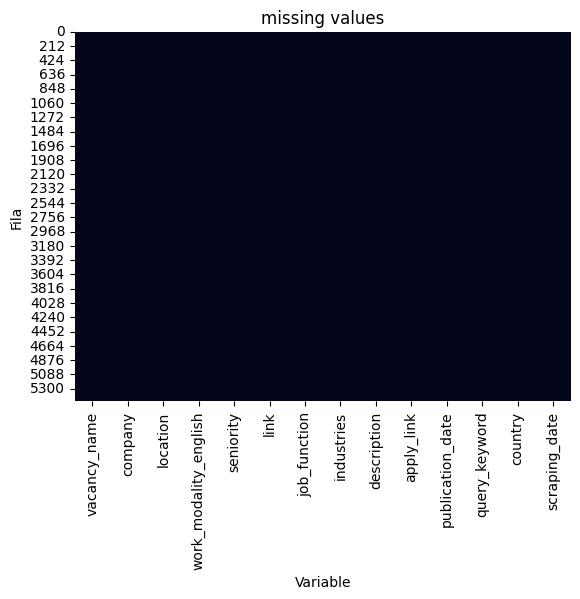

In [ ]:
# %%

sns.heatmap(df.isnull(), cbar=False)
plt.title("missing values")
plt.xlabel('Variable')
plt.ylabel('Fila')

#%%[markdown]

 # categorical variables

Text(0.5, 1.0, "'industries'")

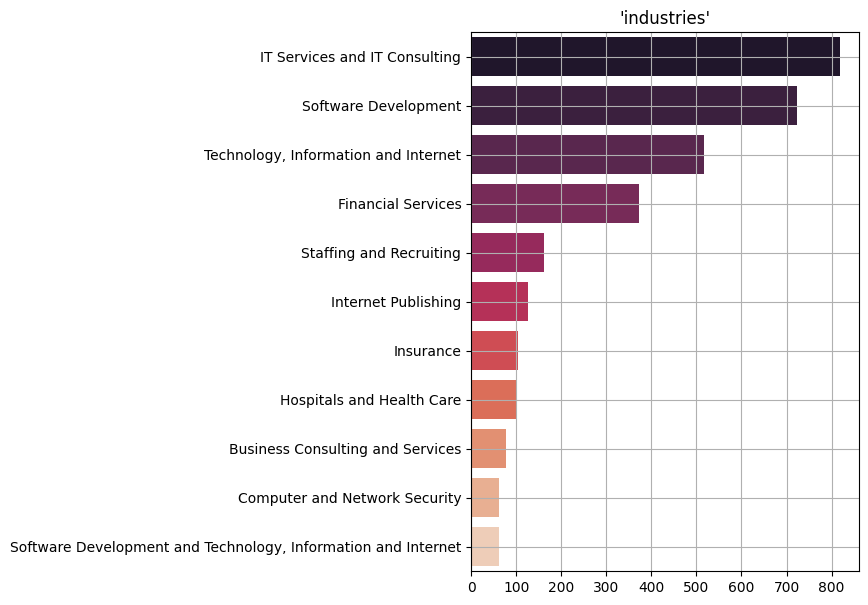

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['industries'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'industries'")

Text(0.5, 1.0, "'company'")

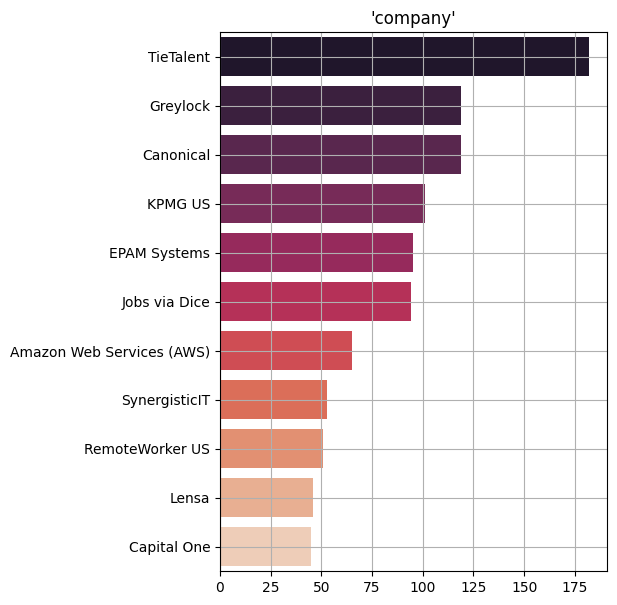

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['company'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'company'")

Text(0.5, 1.0, "'location'")

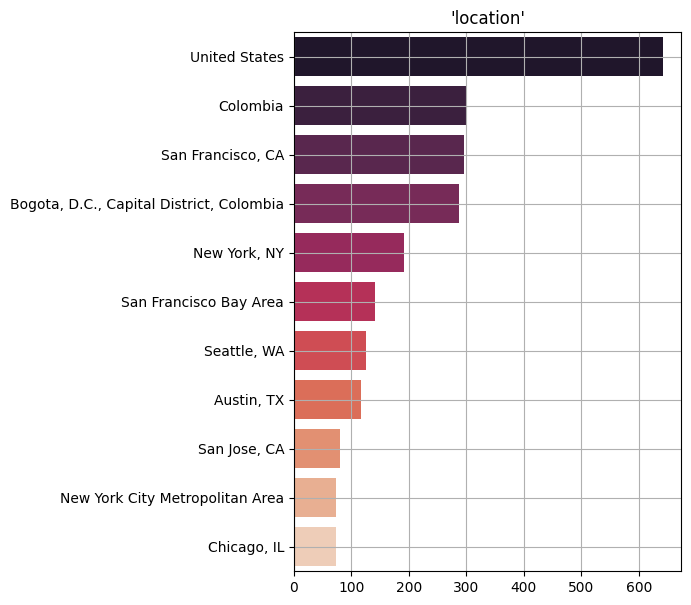

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['location'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'location'")

Text(0.5, 1.0, "'work_modality_english'")

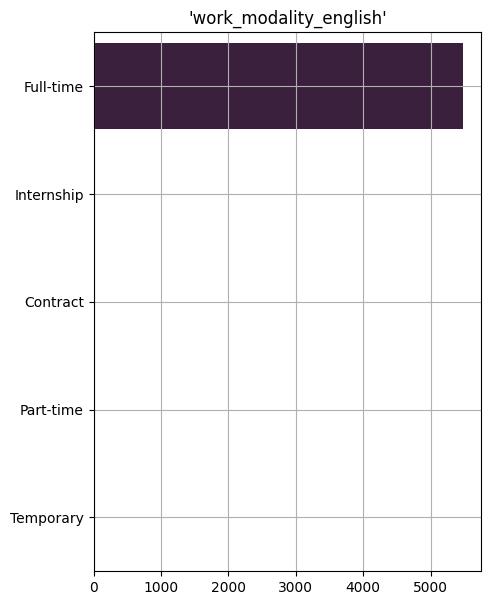

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['work_modality_english'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'work_modality_english'")

Text(0.5, 1.0, "'seniority'")

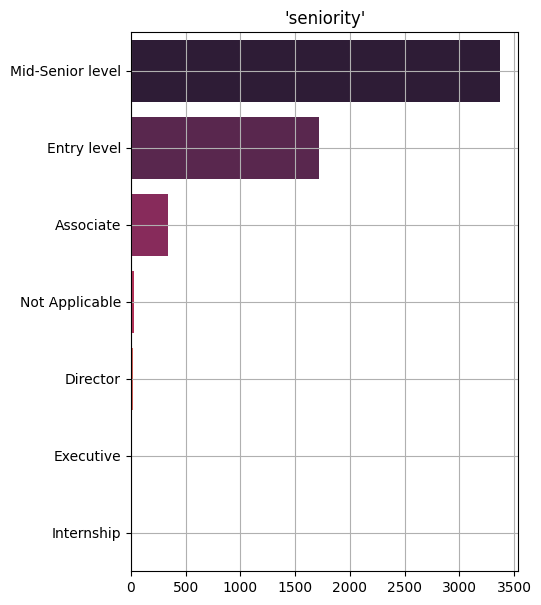

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['seniority'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'seniority'")

Text(0.5, 1.0, "'publication_date'")

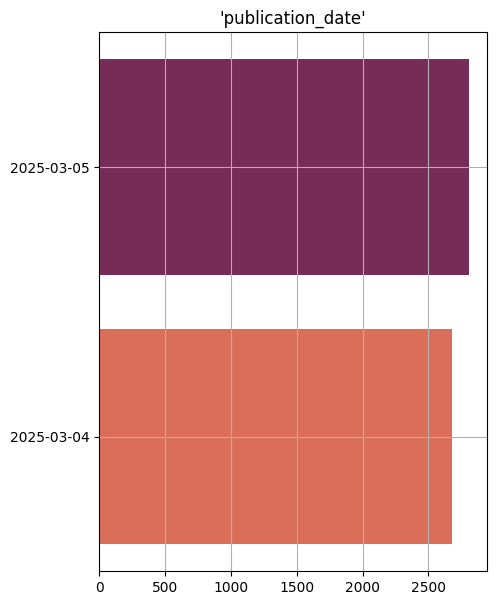

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['publication_date'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'publication_date'")

#%%[markdown]

 # knowledge based filters

In [ ]:
#%%

job_seeker = open_json('../data/job_seekers.json')
job_seeker[0].keys()
seniority_criteria = job_seeker[0]['seniority']
location_criteria = job_seeker[0]['location']
work_modality_criteria = job_seeker[0]['work_modality_english']
excluded_companies = ["BairesDev"]

reading file at: ../data/job_seekers.json


In [ ]:
# %%

df_filtered = df[
    (df["seniority"].isin(seniority_criteria)) &  # Filter by seniority
    (df["location"].isin(location_criteria)) &    # Filter by location
    (df["work_modality_english"].isin(work_modality_criteria)) &  # Filter by work modality
    (~df["company"].isin(excluded_companies))     # Exclude specified companies
].copy()
df_filtered.shape

(4564, 14)

#%%[markdown]

 # categorical variables

Text(0.5, 1.0, "'company'")

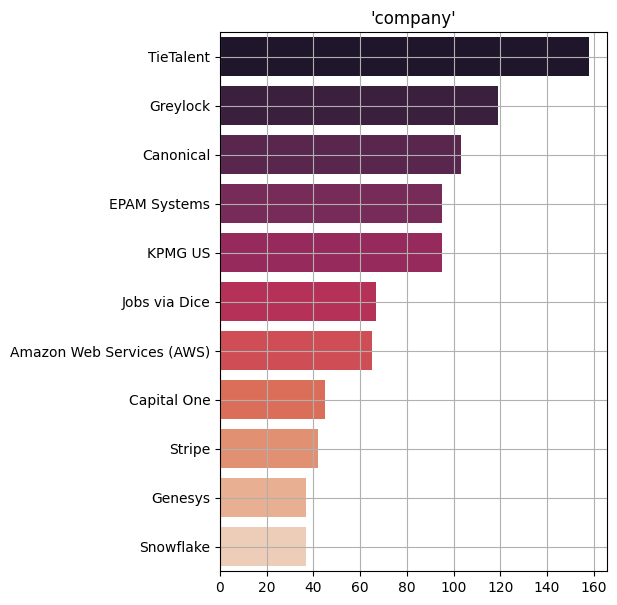

In [ ]:
plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['company'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'company'")

Text(0.5, 1.0, "'location'")

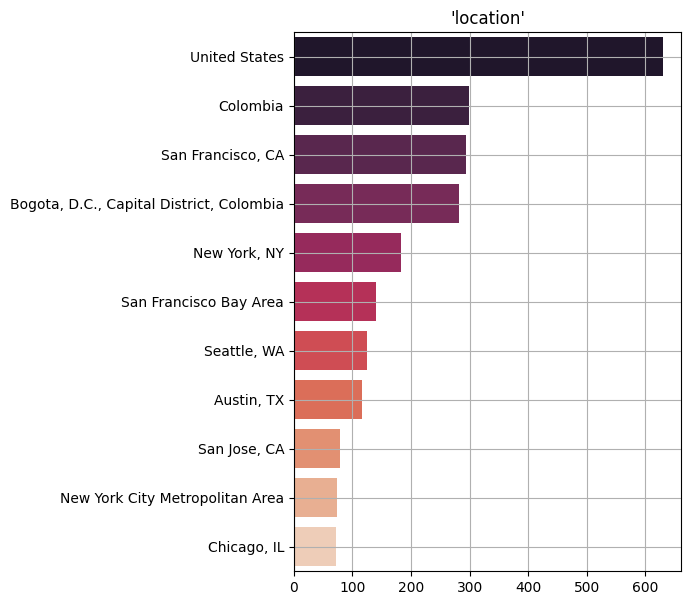

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['location'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'location'")

Text(0.5, 1.0, "'work_modality_english'")

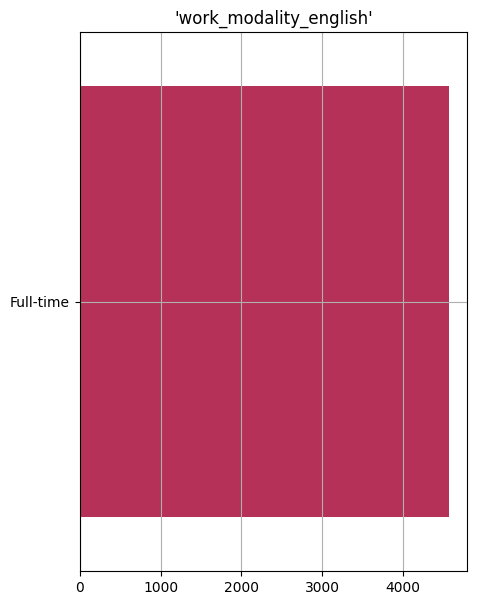

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['work_modality_english'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'work_modality_english'")

Text(0.5, 1.0, "'seniority'")

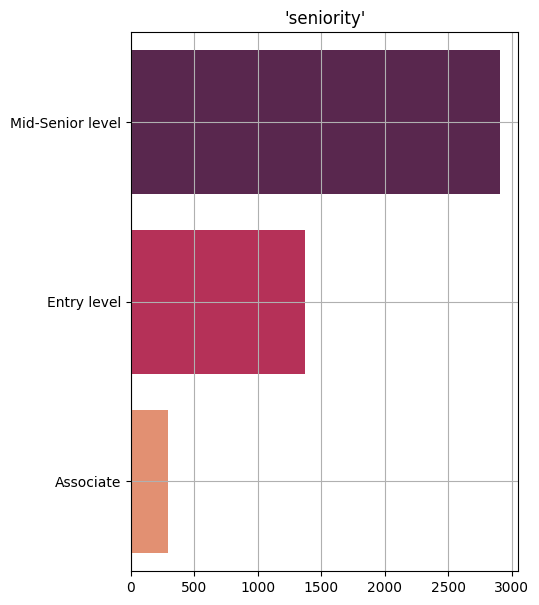

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['seniority'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'seniority'")

Text(0.5, 1.0, "'publication_date'")

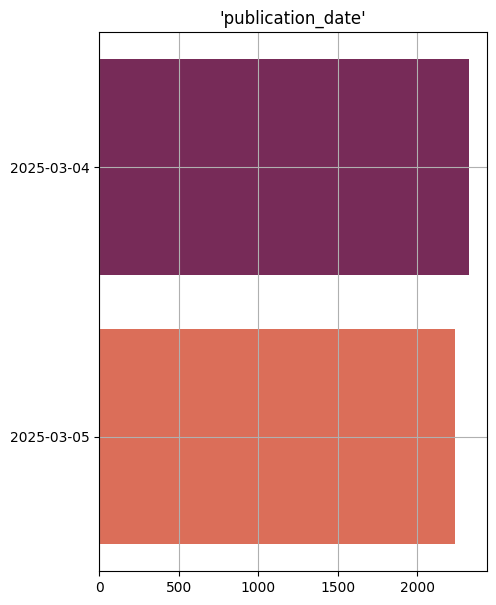

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['publication_date'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'publication_date'")

#%%[markdown]

 # Job title description file

In [ ]:
industries = [
    'IT Services and IT Consulting',
    'Software Development',
    'Technology, Information and Internet',
    'Business Consulting and Services'
]
df_summary = df_filtered[df_filtered['industries'].isin(industries)][['vacancy_name','description']][:1000].copy()
print(df_summary.shape)
df_summary.to_json('../data/vacancy_name_description.json')

(1000, 2)
